In [30]:
#Beer Dataset
import pandas as pd

beer_df = pd.read_csv( 'beer.csv' )
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [31]:
# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform( beer_df[['calories',
'sodium',
'alcohol',
'cost']] ) 

In [33]:
scaled_beer_df

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

In [32]:
#How many clusters exist?

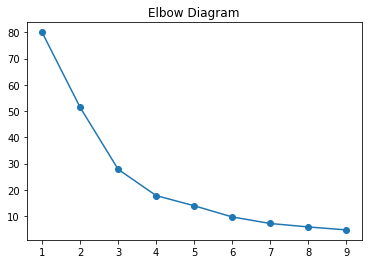

In [10]:
#Finding Optimal Number of Clusters using Elbow Method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( scaled_beer_df )
    cluster_errors.append( clusters.inertia_ )
plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
plt.title( "Elbow Diagram");
#https://scikit-learn.org/stable/modules/clustering.html

In [34]:
#Creating Clusters
k = 3
clusters = KMeans( k, random_state = 42 )
clusters.fit( scaled_beer_df )
beer_df["clusterid"] = clusters.labels_

In [35]:
beer_df

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,1
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
8,Miller_Lite,99,10,4.3,0.43,1
9,Budweiser_Light,113,8,3.7,0.40,1


In [36]:
#Creating Clusters
k = 3
clusters = KMeans( k, random_state = 42 )
clusters.fit( scaled_beer_df )
beer_df["clusterid"] = clusters.labels_

#Cluster 0
beer_df[beer_df.clusterid == 0]
# beers with medium alcohol content and medium cost - largest segment - targeting largest segment of customers

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
10,Coors,140,18,4.6,0.44,0
16,Hamms,139,19,4.4,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0


In [15]:
#Cluster 1
beer_df[beer_df.clusterid == 1]
# light beers with low calories and sodium content - calorie conscious customer segment who wants to drink

,name,calories,sodium,alcohol,cost,clusterid
2,Lowenbrau,157,15,0.9,0.48,1
8,Miller_Lite,99,10,4.3,0.43,1
9,Budweiser_Light,113,8,3.7,0.40,1
11,Coors_Light,102,15,4.1,0.46,1
12,Michelob_Light,135,11,4.2,0.50,1
15,Pabst_Extra_Light,68,15,2.3,0.38,1
18,Olympia_Goled_Light,72,6,2.9,0.46,1
19,Schlitz_Light,97,7,4.2,0.47,1


In [16]:
#Cluster 2
beer_df[beer_df.clusterid == 2]
# expensive beers with relatively high alcohol content - premium brands

,name,calories,sodium,alcohol,cost,clusterid
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
13,Becks,150,19,4.7,0.76,2
14,Kirin,149,6,5.0,0.79,2


In [29]:
# Cluster Centers and Interpreting the Clusters
beer_df.groupby( 'clusterid' )['calories','sodium','alcohol','cost'].agg( ["mean"] ).reset_index()

,clusterid,calories,sodium,alcohol,cost
,,mean,mean,mean,mean
0,0,148.375,21.125,4.7875,0.4075
1,1,105.375,10.875,3.3250,0.4475
2,2,155.250,10.750,4.9750,0.7625


In [40]:
# Fuzzy C means clustering
from fcmeans import FCM
# fit the fuzzy-c-means
fcm = FCM(n_clusters=3)
fcm.fit(scaled_beer_df)

# outputs
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)

# membership degrees of 3 clusters
fcm.u


array([[0.10631734, 0.15365075, 0.74003191],
       [0.0207003 , 0.02214902, 0.95715068],
       [0.24972096, 0.41777126, 0.33250778],
       [0.9090305 , 0.04129901, 0.04967049],
       [0.98482333, 0.00690902, 0.00826765],
       [0.05780377, 0.1015931 , 0.84060313],
       [0.12001291, 0.09505322, 0.78493387],
       [0.06521259, 0.07450381, 0.86028361],
       [0.04446087, 0.88484159, 0.07069754],
       [0.04105413, 0.89634411, 0.06260176],
       [0.0380416 , 0.05770222, 0.90425618],
       [0.07390598, 0.74786421, 0.17822981],
       [0.23583148, 0.45903225, 0.30513626],
       [0.65464342, 0.12147956, 0.22387702],
       [0.9190821 , 0.04259909, 0.03831881],
       [0.10798074, 0.70993197, 0.18208729],
       [0.02794256, 0.04822212, 0.92383532],
       [0.02969664, 0.03456214, 0.93574122],
       [0.08692868, 0.8188    , 0.09427132],
       [0.06384577, 0.86850324, 0.06765099]])

In [18]:
fcm_labels

array([2, 2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1],
      dtype=int64)

In [39]:
beer_df["fuzzy_clusterid"] = fcm_labels

pd.concat([beer_df,pd.DataFrame(fcm.u)],axis=1)

,name,calories,sodium,alcohol,cost,clusterid,fuzzy_clusterid,0,1,2
0,Budweiser,144,15,4.7,0.43,0,2,0.106317,0.153651,0.740032
1,Schlitz,151,19,4.9,0.43,0,2,0.020700,0.022149,0.957151
2,Lowenbrau,157,15,0.9,0.48,1,1,0.249721,0.417771,0.332508
3,Kronenbourg,170,7,5.2,0.73,2,0,0.909031,0.041299,0.049670
4,Heineken,152,11,5.0,0.77,2,0,0.984823,0.006909,0.008268
5,Old_Milwaukee,145,23,4.6,0.28,0,2,0.057804,0.101593,0.840603
6,Augsberger,175,24,5.5,0.40,0,2,0.120013,0.095053,0.784934
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,2,0.065213,0.074504,0.860284
8,Miller_Lite,99,10,4.3,0.43,1,1,0.044461,0.884842,0.070698
9,Budweiser_Light,113,8,3.7,0.40,1,1,0.041054,0.896344,0.062602


In [20]:
beer_df[beer_df.fuzzy_clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid,fuzzy_clusterid
3,Kronenbourg,170,7,5.2,0.73,2,0
4,Heineken,152,11,5.0,0.77,2,0
13,Becks,150,19,4.7,0.76,2,0
14,Kirin,149,6,5.0,0.79,2,0


In [21]:
beer_df[beer_df.fuzzy_clusterid == 1]

,name,calories,sodium,alcohol,cost,clusterid,fuzzy_clusterid
2,Lowenbrau,157,15,0.9,0.48,1,1
8,Miller_Lite,99,10,4.3,0.43,1,1
9,Budweiser_Light,113,8,3.7,0.40,1,1
11,Coors_Light,102,15,4.1,0.46,1,1
12,Michelob_Light,135,11,4.2,0.50,1,1
15,Pabst_Extra_Light,68,15,2.3,0.38,1,1
18,Olympia_Goled_Light,72,6,2.9,0.46,1,1
19,Schlitz_Light,97,7,4.2,0.47,1,1


In [22]:
beer_df[beer_df.fuzzy_clusterid == 2]

,name,calories,sodium,alcohol,cost,clusterid,fuzzy_clusterid
0,Budweiser,144,15,4.7,0.43,0,2
1,Schlitz,151,19,4.9,0.43,0,2
5,Old_Milwaukee,145,23,4.6,0.28,0,2
6,Augsberger,175,24,5.5,0.40,0,2
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,2
10,Coors,140,18,4.6,0.44,0,2
16,Hamms,139,19,4.4,0.43,0,2
17,Heilemans_Old_Style,144,24,4.9,0.43,0,2


In [24]:
# membership degrees of 3 clusters
fcm.u
#[0.23583148, 0.45903225, 0.30513626]
pd.concat([beer_df,pd.DataFrame(fcm.u)],axis=1)

,name,calories,sodium,alcohol,cost,clusterid,fuzzy_clusterid,0,1,2
0,Budweiser,144,15,4.7,0.43,0,2,0.106317,0.153651,0.740032
1,Schlitz,151,19,4.9,0.43,0,2,0.020700,0.022149,0.957151
2,Lowenbrau,157,15,0.9,0.48,1,1,0.249721,0.417771,0.332508
3,Kronenbourg,170,7,5.2,0.73,2,0,0.909031,0.041299,0.049670
4,Heineken,152,11,5.0,0.77,2,0,0.984823,0.006909,0.008268
5,Old_Milwaukee,145,23,4.6,0.28,0,2,0.057804,0.101593,0.840603
6,Augsberger,175,24,5.5,0.40,0,2,0.120013,0.095053,0.784934
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,2,0.065213,0.074504,0.860284
8,Miller_Lite,99,10,4.3,0.43,1,1,0.044461,0.884842,0.070698
9,Budweiser_Light,113,8,3.7,0.40,1,1,0.041054,0.896344,0.062602


In [ ]:
# installing package
# Anaconda Prompt -> pip install fuzzy-c-means

In [17]:
#Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

h_clusters = AgglomerativeClustering( 3 )
h_clusters.fit( scaled_beer_df )
beer_df["h_clusterid"] = h_clusters.labels_

In [18]:
beer_df[beer_df.h_clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
2,Lowenbrau,157,15,0.9,0.48,1,0
8,Miller_Lite,99,10,4.3,0.43,1,0
9,Budweiser_Light,113,8,3.7,0.40,1,0
11,Coors_Light,102,15,4.1,0.46,1,0
12,Michelob_Light,135,11,4.2,0.50,1,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1,0
18,Olympia_Goled_Light,72,6,2.9,0.46,1,0
19,Schlitz_Light,97,7,4.2,0.47,1,0


In [19]:
beer_df[beer_df.h_clusterid == 1]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
0,Budweiser,144,15,4.7,0.43,0,1
1,Schlitz,151,19,4.9,0.43,0,1
5,Old_Milwaukee,145,23,4.6,0.28,0,1
6,Augsberger,175,24,5.5,0.40,0,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1
10,Coors,140,18,4.6,0.44,0,1
16,Hamms,139,19,4.4,0.43,0,1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1


In [20]:
beer_df[beer_df.h_clusterid == 2]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
3,Kronenbourg,170,7,5.2,0.73,2,2
4,Heineken,152,11,5.0,0.77,2,2
13,Becks,150,19,4.7,0.76,2,2
14,Kirin,149,6,5.0,0.79,2,2


In [15]:
# All the clustering algorithms have created similar clusters. Cluster ids have changed

